# Part 1

## Python Coding and Data Set
Load in the data file and header file provided
The dataframe does not currently have a header, load in the header file and attach it to the dataframe

In [2]:
import pandas as pd
file = open('field_names.txt', 'r')
field_names = file.read().split('\n')
df = pd.read_csv('breast-cancer.csv',names=field_names)
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Comment on any steps you might take to evaluate or transform the dataset.
##### Evaluate the dataset
Looking at the data, I notice that the column names don't correctly match the data. You can see this because the worst values are frequently far different then the mean values for the same field. For example, the first row has texture_mean = 1001.0, but texture_worst = 0.27760. It doesn't make sense that the worst value is so much _smaller_ than the mean, particularly given the low standard error. If I were dealing with this problem in the real world, I'd start by confirming that the column headings are really correctly ordered relatively to the data.

#### Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ?
Yes, the values for median and mean smoothness are higher for malignant tumors.

In [4]:
#median smoothness
df.groupby(['diagnosis']).median()[['smoothness_mean','compactness_mean']]

,smoothness_mean,compactness_mean
diagnosis,,
B,1.8510,0.01631
M,3.6795,0.02859


In [5]:
#mean smoothness
df.groupby(['diagnosis']).mean()[['smoothness_mean','compactness_mean']]

,smoothness_mean,compactness_mean
diagnosis,,
B,2.000321,0.021438
M,4.323929,0.032281


In [11]:
#### Box plots for distribution of mean and median smoothness and compactness
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
df.boxplot('smoothness_mean','diagnosis', ax=ax[0])
df.boxplot('compactness_mean','diagnosis', ax=ax[1])
df.boxplot('radius_mean','diagnosis', ax=ax[2])

#### Write a function to generate bootstrap samples of the data.

In [37]:
from sklearn.utils import resample
def bootstrap_samples(dataframe,number_of_samples,sample_size):
    samples = []
    for x in range(0, number_of_samples):
        samples.append(resample(df, replace=True, n_samples=number_of_samples, random_state=1))    
    return samples

samples_array = bootstrap_samples(df,len(df),30)

## Exploratory Analysis
Identify 2-3 variables that are predictive of a malignant tumor.
Display the relationship visually and write 1-2 sentences explaining the relationship

In [13]:
df['diagnosisInt']=(df['diagnosis']=='B').astype(int)
df.corr()['diagnosisInt'].abs().nlargest(4)

diagnosisInt               1.000000
fractal_dimension_mean     0.793566
concave_points_sd_error    0.782914
perimeter_sd_error         0.776614
Name: diagnosisInt, dtype: float64

In [14]:
#### Write a function to generate bootstrap samples of the data.

import numpy.random as npr
n = len(df)
samples = []
idx = npr.randint(0, n, (100, n))
for i, val in enumerate(idx):
    samples.append(df.iloc[i,:])
df.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,diagnosisInt
247,884626,B,12.89,14.11,84.95,512.2,0.0876,0.1346,0.1374,0.0398,...,17.7,105.0,639.1,0.1254,0.5849,0.7727,0.1561,0.2639,0.1178,1


## Build a model to predict the malignant tumors
Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.

### First Method - Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df.drop(['diagnosis','diagnosisInt'],axis=1),
                                                    df['diagnosis'], test_size=0.30, random_state=301)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=10.0**-2,solver='liblinear')
logmodel.fit(X_train_std,y_train)
predictions = logmodel.predict(X_test_std)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       113
           M       0.96      0.91      0.94        58

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



In [16]:
#### Avoid overfitting by choosing the regularlization parameter that does best on the test data

import numpy as np

regularizationParam, auc, log_loss_difference = [], [], []

from sklearn.metrics import roc_auc_score

for c in np.arange(-5, 5):
    logmodel = LogisticRegression(C=10.0**c, random_state=0,solver='liblinear')
    logmodel.fit(X_train_std, y_train)
    regularizationParam = np.append(regularizationParam,c)
    auc = np.append(auc,roc_auc_score(y_test,logmodel.predict_proba(X_test_std)[:,1]))

The graph below shows the highest auc on the test data with a regularization parameter of c = -2. We look at the auc on the test data rather than the training data, because a high AUC on the test data could be due to overfitting. By looking at the test data, we see the AUC on data the model wasn't exposed to when we fit the model.

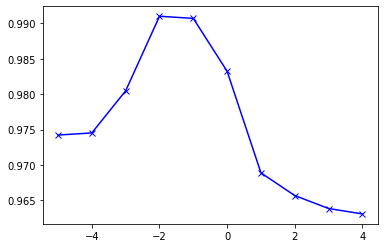

In [17]:
import matplotlib.pyplot as plt
plt.plot(regularizationParam, auc, color='blue', marker='x', label='mylabel')

#### Evaluating Model Fit by Displaying a confusion matrix

In [18]:
logmodel = LogisticRegression(C=10.0**-2, random_state=0,solver='liblinear')
logmodel.fit(X_train_std, y_train)
predictions = logmodel.predict(X_test_std)
confusion_matrix(y_test, predictions)

array([[111,   2],
       [  5,  53]], dtype=int64)

In [19]:
#### Classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       113
           M       0.96      0.91      0.94        58

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



#### In each model, identify the most important predictive variables and explain how you identified them.

Based on the absolute value of the coefficients, convavity_worst, concave_points_std_error, and fractal_dimension_mean are the three most important variables. Not surprisingly, the ID label is of low importance - this should just be a random ordering of the observations, so it would be surprising if it were predictive.

Full list of coeifficients sorted by importance below.

In [20]:
coef_df = pd.DataFrame({'label': X_test.columns, 'abs coef': abs(logmodel.coef_[0]), 'coef': logmodel.coef_[0], 'odds ratio': np.exp(logmodel.coef_[0])}, columns=['label', 'abs coef', 'coef', 'odds ratio'])
coef_df.sort_values(by=['abs coef'], ascending=False)

,label,abs coef,coef,odds ratio
21,concavity_worst,0.230914,0.230914,1.259750
23,concave_points_sd_error,0.223046,0.223046,1.249879
28,fractal_dimension_mean,0.218217,0.218217,1.243857
24,concave_points_worst,0.210356,0.210356,1.234117
8,perimeter_sd_error,0.209471,0.209471,1.233026
1,radius_mean,0.205206,0.205206,1.227778
3,radius_worst,0.203965,0.203965,1.226255
4,texture_mean,0.197671,0.197671,1.218562
22,concave_points_mean,0.183726,0.183726,1.201687
11,area_sd_error,0.178114,0.178114,1.194961


##### second method - random forest
We use gridsearch to choose the hyperparameters that give the best result on crossvalidation. This allows us to choose hyperparameters that perform best on the test data, hence minimizing overfitting

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_std, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

We use the selected hyperparameters to train the final model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf =RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='entropy')
clf.fit(X_train_std, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf =RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='entropy')
clf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
### Random forest does not perform as well as the logistic model on the test data

In [24]:
predictions = clf.predict(X_test_std)
confusion_matrix(y_test, predictions)

array([[109,   4],
       [  5,  53]], dtype=int64)

#### Identify the most important predictive variables and explain how you identified them.
See below, where features are sorted by importance

In [25]:
randomforest_coef_df = pd.DataFrame({'label': X_test.columns, 'importances': clf.feature_importances_}, columns=['label', 'importances'])
randomforest_coef_df.sort_values(by=['importances'], ascending=False)

,label,importances
23,concave_points_sd_error,0.124953
24,concave_points_worst,0.118352
21,concavity_worst,0.111328
8,perimeter_sd_error,0.109609
28,fractal_dimension_mean,0.096208
3,radius_worst,0.051032
4,texture_mean,0.046547
7,perimeter_mean,0.043506
27,symmetry_worst,0.037537
14,smoothness_sd_error,0.036178


## To Technical Audiences
#### Explain the limitations of your analysis and identify possible further steps you could take.
 
No instruction was given regarding tradeoff between sensitivity and specificity. In a real world example, we might decide that we'd like to identify a high % of malignancies, even at the cost of incorrectly identifying some benign cases as malignant. We would set a risk threshold based on this decision.

More different model types could be tried. We could also try combining measurements (ratios, squares, products) to make other variables and creating binary variables for measurments that could be categorized as outliers.

If we look at the boxplot for smoothness_mean, essentially 100% of the high value outliers are for malignancies. We could create an smoothness_mean_high_outlier variable to improve the model.

The ID column should be removed from the model, since it is just a random number to identify the row.

Before applying this model to other data sets, we'd want to confirm that the sample used to train the model was representive. For example, if this data was created using younger Caucasian women, we might not want to use it to make predictions on image

## To Non-Technical Audiences
#### Write a short summary of your analysis, explaining how your model works and how it performs.
#### Briefly explain the factors that contributed to malignant vs benign tumor identification.

**Executive summary**: When the best model predicts the tumor is malignant, it is correct 96.4% of the time!  And when it predicts the tumor is benign, it is correct 95.7% of the time.

For most of the risk factors, the likelihood of malignancy increases. Fractal_dimension_mean, concave_points_sd_error and perimeter_sd_error show the strongest association with malignancy.

By looking at muliple measurements for the tumor, the models can better distinguish malignant from benign tumors.

For the random forest model, concave_points_sd_error, concave_points_worst, and concavity_worst were the three most imporant predictors. For the logistic model, concavity_worst, concave_points_sd_error and fractal_dimension_mean were the top predictors. (If more time, would do a bar chart here showing variable importance for the top 5 predictors).

The logistic model increases the risk for each risk factor, without considering possible interactions between the risk factors, while the random forest model does capture those intractions.